### Importing Libraries

In [69]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, r2_score


##### Importing dataset

In [3]:

dataset_path = '/content/drive/MyDrive/datasets/car_dataset.csv'
car = pd.read_csv(dataset_path)
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Data Preprocessing

In [70]:
# features in our dataset
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

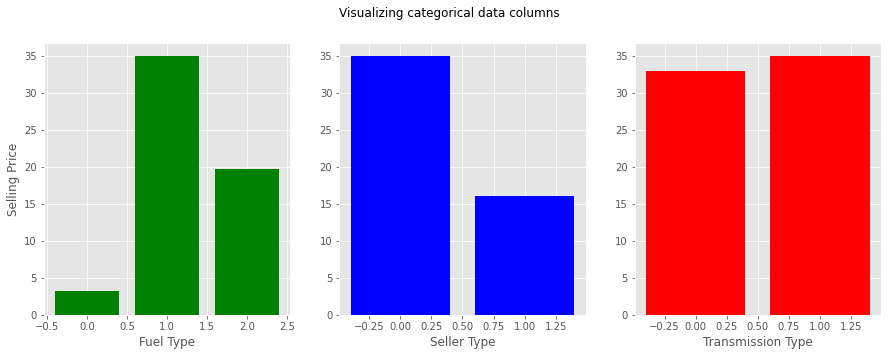

In [71]:
from matplotlib import style

fuel_type = car['Fuel_Type']
seller_type = car['Seller_Type']
transmission_type = car['Transmission']
selling_price = car['Selling_Price']

style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1, 3, 1)
plt.bar(fuel_type, selling_price, color='green')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.subplot(1, 3, 2)
plt.bar(seller_type, selling_price, color='blue')
plt.xlabel('Seller Type')
plt.subplot(1, 3, 3)
plt.bar(transmission_type, selling_price, color='red')
plt.xlabel('Transmission Type')
plt.show()

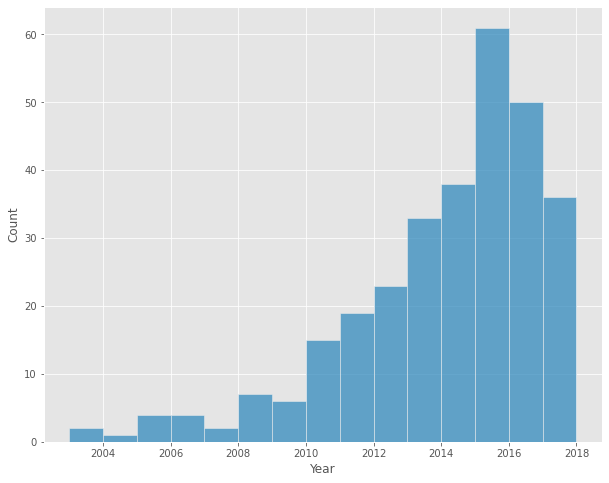

In [62]:
plt.figure(figsize=(10, 8))

sns.histplot(data=car, x="Year", bins=15)

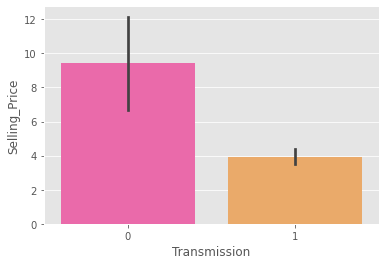

In [63]:
sns.barplot(x='Transmission',y='Selling_Price',data=car,palette='spring')

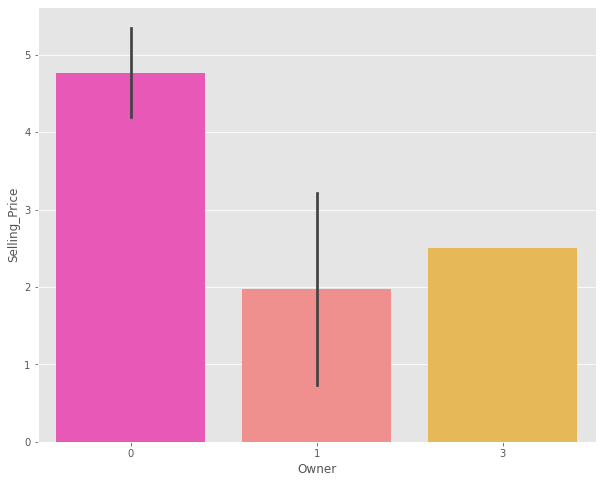

In [64]:
plt.figure(figsize=(10,8))
sns.barplot(x='Owner',y='Selling_Price',data=car,palette='spring')

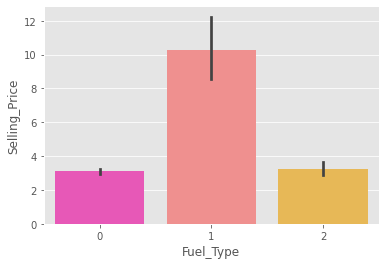

In [65]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=car,palette='spring')

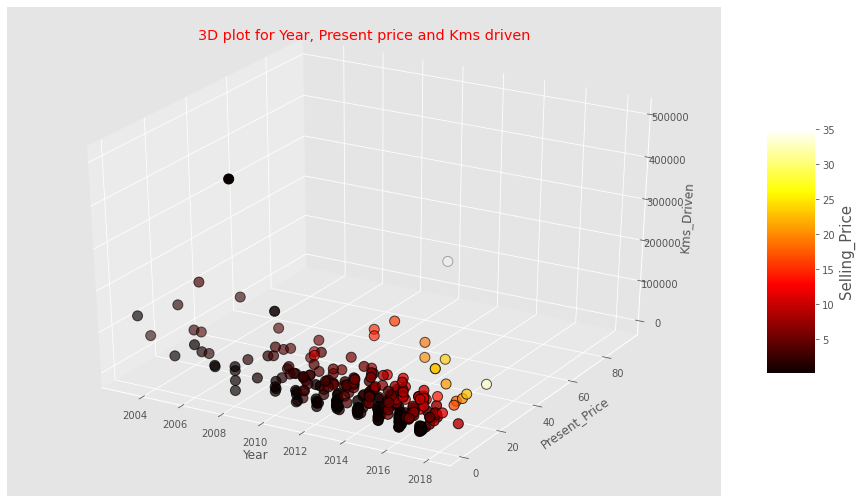

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(car["Year"],
           car["Present_Price"],
           car["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=car["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

### Data Statistics

In [72]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


In [73]:
print(car['Fuel_Type'].value_counts())
print(car['Seller_Type'].value_counts())
print(car['Transmission'].value_counts())

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
1    261
0     40
Name: Transmission, dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a7ff8e650>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a7ff1a690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a7ff8e210>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a82053fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a82053dd0>],
 'means': []}

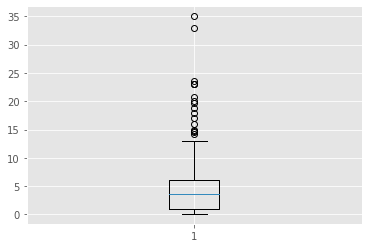

In [74]:
plt.boxplot(car['Selling_Price'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a8044bd90>]],
      dtype=object)

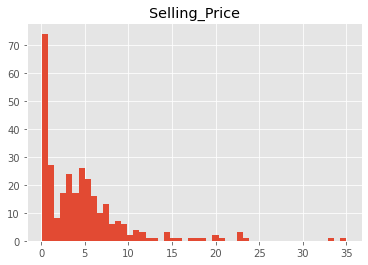

In [75]:
car.hist(column='Selling_Price', bins= 50)

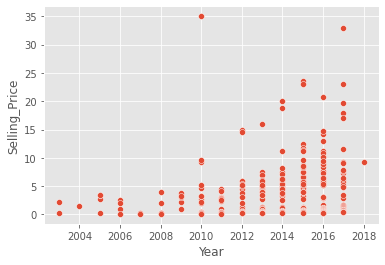

In [76]:
sns.scatterplot(data=car,y='Selling_Price',x='Year')

In [77]:
# Encoding features for model training
enc_fuel = LabelEncoder()
car['Fuel_Type'] = enc_fuel.fit_transform(car['Fuel_Type'])
enc_seller = LabelEncoder()
car['Seller_Type'] = enc_seller.fit_transform(car['Seller_Type'])
enc_trn  = LabelEncoder()
car['Transmission'] = enc_trn.fit_transform(car['Transmission'])

In [78]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [79]:
X = car.drop(['Car_Name','Selling_Price'], axis=1)
y = car['Selling_Price']

### Spliting dataset into training and testing

In [80]:
# 70% training, and 30% testing dataset division
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

### Model Training

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)
linear_model = model.score(X_test, y_test) 
print("linear regression model score: ",linear_model) # returns r^2 value
print("Model Coefficients: " ,model.coef_)
print("Model Intercepts: ",model.intercept_)


linear regression model score:  0.8773175030338071
Model Coefficients:  [ 3.69776390e-01  4.29060407e-01 -3.78391048e-06 -1.44734843e+00
 -1.13112818e+00 -1.44176086e+00 -1.04751662e+00]
Model Intercepts:  -738.7520892651312


### Making Prediction

In [82]:
y_pred = model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

     Actual  Predicted
177    0.35   2.845039
289   10.11   8.174330
228    4.95   6.155032
198    0.15  -1.534743
60     6.95   9.104781
..      ...        ...
119    1.05   0.934981
19     2.65   3.429087
181    0.30   1.266282
79    14.50  16.587431
114    1.15   1.446144

[91 rows x 2 columns]


### Testing the model

In [83]:

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

Mean squared error: 3.49
Coefficient of determination: 0.88
R²: 0.8773175030338071


In [84]:
X_test.shape, y_test.shape

((91, 7), (91,))

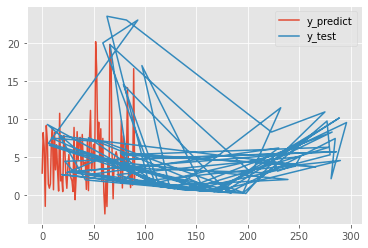

In [85]:

plt.plot(y_pred,label='y_predict')
plt.plot(y_test,label='y_test')
plt.legend()

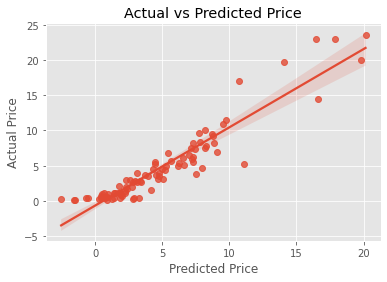

In [86]:
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs Predicted Price")
plt.show()

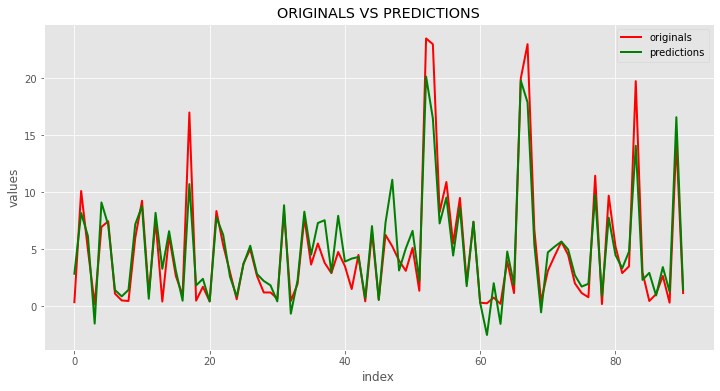

In [87]:
# Plot for prediction vs originals
test_index=y_test.reset_index()["Selling_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
prediction=pd.DataFrame(y_pred)
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()